In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.regularizers import L2
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST

mndata = MNIST('samples')

In [12]:
# Load Training set
X_train, y_train = mndata.load_training()

X_train = np.array(X_train)

y_train = np.array(y_train)
y_train = y_train.reshape([-1, 1])
y_train.shape

(60000, 1)

In [4]:
# Load Testing set

X_test, y_test = mndata.load_testing()
X_test = np.array(X_test)

y_test = np.array(y_test)
y_test = y_test.reshape([-1, 1])
y_test.shape

(10000, 1)

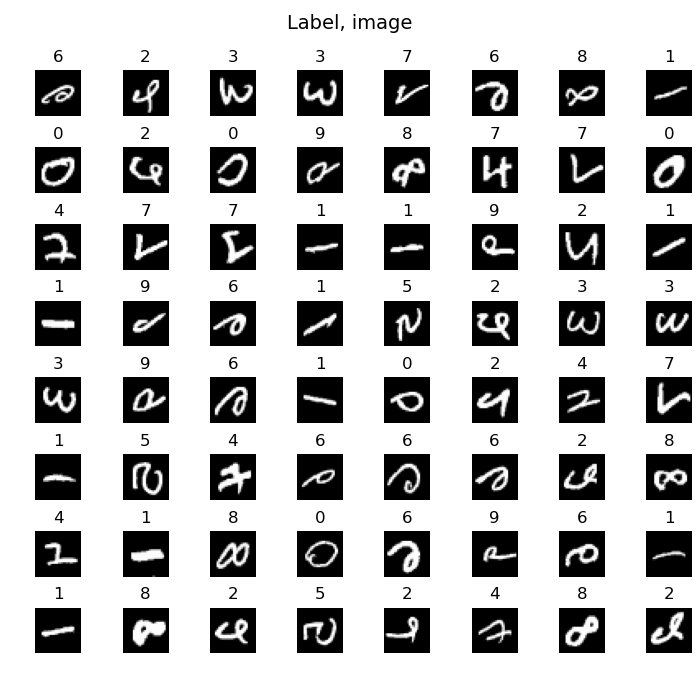

In [5]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(7, 7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Pick random images
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [9]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Reshape([28, 28, 1]),
    Conv2D(kernel_size=(5, 5), filters=8, activation='relu', padding='VALID', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(6, 6)),
    Flatten(),
    Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,498
Trainable params: 1,498
Non-trainable params: 0
______________________________________________________

2022-12-10 20:46:09.045457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 20:46:09.081946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 20:46:09.082256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 20:46:09.084535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]  # Not needed, just trying other parameters
)

In [13]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30


2022-12-10 20:47:35.505280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-10 20:47:36.587859: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-10 20:47:36.588685: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-10 20:47:36.588723: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-10 20:47:36.589606: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-10 20:47:36.589697: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1875/1875 [==============================] - 9s 3ms/step - loss: 2.6721 - accuracy: 0.8013
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.9299
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1760 - accuracy: 0.9500
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1433 - accuracy: 0.9583
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1325 - accuracy: 0.9615
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1191 - accuracy: 0.9654
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1152 - accuracy: 0.9664
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9674
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9687
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1054 - accurac

In [14]:
test_predict = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
predict_y = list(map(np.argmax, test_predict))

In [29]:
correct_predictions = np.sum([1 if act == pred else 0 for act, pred in zip(y_test, predict_y) ] )

print(f'Accuracy using CNN: {correct_predictions/ len(y_test)}')

Accuracy using CNN: 0.9673
